# **Universidad ICESI**
*Milton Orlando Sarria*


## **Mínimos Cuadrados Ordinarios (OLS)**


### Problema,
Se tienen un conjunto de observaciones ${(x_1^{(1)},y^{(1)}),(x_1^{(2)},y^{(2)}),(x_1^{(3)},y^{(3)}),...,(x_1^{(N)},y^{(N)})}$. Llamaremos a la variable $x_1$ predictor o feature. Llamaremos a la variable y, respuesta o salida (target en inglés).
La idea es construir un modelo que aprenda a **predecir** o **estimar** la respuesta y en función de un predictor $x_1$. A esta predicción o estimación la llamaremos en general $\hat{y}$.
    
El algoritmo de **Mínimos Cuadrados Ordinarios (OLS)** se utiliza para estimar los parámetros de un modelo de regresión lineal, minimizando la suma de los errores cuadráticos entre los valores observados y los valores ajustados.



---
### **1. Modelo Lineal simple**

El modelo de **regresión lineal simple** se utiliza para modelar la relación entre una única variable independiente $x$ y una variable objetivo (o dependiente) $y$. El modelo asume una relación lineal entre estas variables y se representa de la siguiente manera:

$
h_\theta(x) = \theta_0 + \theta_1 x + \epsilon
$

Aquí:

- $h_\theta(x)$ es el valor predicho (o hipótesis).
- $\theta_0$ es el intercepto, es decir, el valor de $y$ cuando $x = 0$.
- $\theta_1$ es la pendiente, que determina cuánto cambia \(y\) por cada unidad de cambio en \(x\).
- $\epsilon$ es el error aleatorio con distribución normal

La tarea del modelo es encontrar los valores de $\theta_0$ y $\theta_1$ que minimicen el error entre las predicciones $h_\theta(x)$ y los valores reales de $y$. 


---

### Extensión a Representación Matricial

Para generalizar el modelo de regresión lineal simple a una **representación matricial**, se reescribe la ecuación para incluir un término 1 que representa el intercepto ($\theta_0$). Para ello, extendemos la entrada $x$ a un vector de dos componentes, de la forma:

$
\mathbf{x} = \begin{bmatrix} 1 \\ x \end{bmatrix}
$

Y los parámetros $\theta$ se representan también como un vector:

$
\mathbf{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}
$

Entonces, la ecuación de la hipótesis se reescribe en forma matricial como:

$
h_\theta(\mathbf{x}) = \mathbf{\theta}^T \mathbf{x}
$

Donde:

- $\mathbf{\theta}^T$ es la transposición de $\mathbf{\theta}$, convirtiéndolo en un vector fila: $[ \theta_0, \theta_1 ]$.
- $\mathbf{x}$ es el vector de entrada extendido: $[ 1, x ]^T$.

La hipótesis ahora se calcula como el producto escalar ([producto punto](https://en.wikipedia.org/wiki/Dot_product)):

$
h_\theta(\mathbf{x}) = \mathbf{\theta} \cdot \mathbf{x} = \mathbf{\theta}^T \mathbf{x}= \theta_0 \cdot 1 + \theta_1 \cdot x
$

Que es equivalente a la forma original $h_\theta(x) = \theta_0 + \theta_1 x$.

---

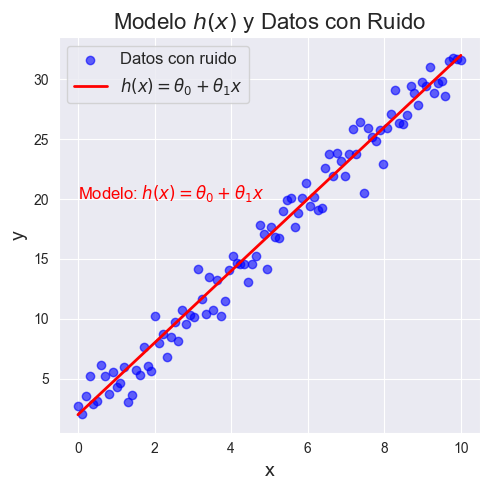

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la línea recta original
theta_0 = 2  # Intercepto
theta_1 = 3  # Pendiente

# Generar datos
np.random.seed(42)  # Semilla para reproducibilidad
x = np.linspace(0, 10, 100)  # 100 puntos equidistantes entre 0 y 10
y_true = theta_0 + theta_1 * x  # Línea recta original
ruido = 0.5*np.random.normal(0, 3, size=x.shape)  # Ruido gaussiano
y = y_true + ruido  # Datos con ruido

# Crear la gráfica
plt.figure(figsize=(5, 5))

# Graficar los datos con ruido
plt.scatter(x, y, color='blue', label='Datos con ruido', alpha=0.6)

# Graficar la línea recta original (modelo)
plt.plot(x, y_true, color='red', label=r'$h(x) = \theta_0 + \theta_1 x$', linewidth=2)

# Añadir texto en la gráfica
plt.text(0, 20, r'Modelo: $h(x) = \theta_0 + \theta_1 x$', fontsize=12, color='red')

# Configuración de la gráfica
plt.title('Modelo $h(x)$ y Datos con Ruido', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


### **2. MSE: error cuadrático medio**
La función de costo del **error cuadrático medio (MSE)** se utiliza en regresión lineal para medir el error entre las predicciones del modelo y los valores reales de los datos. A continuación, explicamos paso a paso cómo se deriva esta función:



---
### 2.1. Definir las predicciones del modelo
Suponga que tiene $m$ observaciones, para cada observación tiene la respuesta correcta. Entonces tiene el par $\{x^{(i)},y^{(i)}\}$ que representa el ejemplo o la observación  $i$-ésima. 

En regresión lineal, las predicciones $\hat y^{(i)}$ para una observación $x^{(i)}$ se calculan usando la hipótesis:

$
\hat y^{(i)}=h_\theta(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}
$

O en forma matricial (con $x^{(i)}$ extendido a $[1, x^{(i)}]$):

$
h_\theta(x^{(i)}) = \mathbf{\theta}^T \mathbf{x}^{(i)}
$

Donde:

- $\hat y^{(i)}$ = $h_\theta(x^{(i)})$: Predicción del modelo para la observación $i$.
- $y^{(i)}$: Valor real (observado) de la variable objetivo para la observación $i$.


El objetivo es minimizar la diferencia entre $\hat y^{(i)}$ y $y^{(i)}$.

---

### 2.2. Calcular el error para cada observación

El error para una sola observación $i$ es la diferencia entre el valor predicho $h_\theta(x^{(i)})$ y el valor real $y^{(i)}$:

$
\text{Error para } i = h_\theta(x^{(i)}) - y^{(i)}
$

---
### 2.3. Definir el error cuadrático

Para evitar que los errores positivos y negativos se cancelen entre sí, elevamos al cuadrado el error:

$
\text{Error cuadrático para } i = (h_\theta(x^{(i)}) - y^{(i)})^2
$

El cuadrado asegura que los errores grandes (positivos o negativos) tengan un mayor impacto.

---

### 2.4. Calcular el error promedio (MSE)

Si tenemos $m$ observaciones en total, la suma de los errores cuadráticos de todas las observaciones es:

$
\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2
$

El error cuadrático medio (MSE) se obtiene dividiendo esta suma entre el número total de observaciones $m$:

$
J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2
$

Aquí:

- $J(\theta)$: Es la función de costo que queremos minimizar.
- $m$: Número de observaciones en el conjunto de datos.
- $(h_\theta(x^{(i)}) - y^{(i)})^2$: Error cuadrático para cada observación.

---



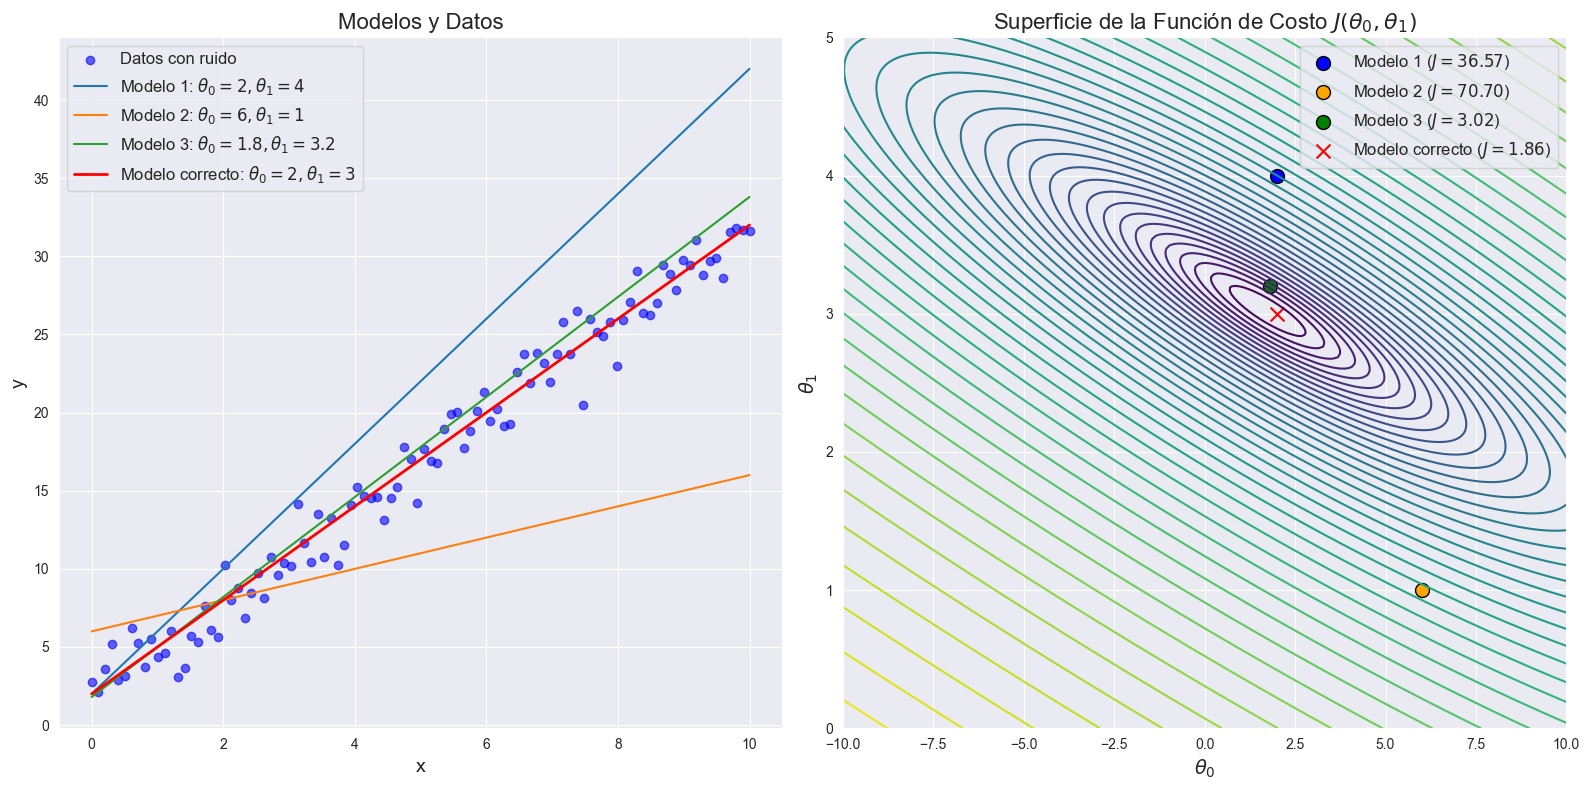

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función de costo
def calcular_costo(x,y,t0, t1):
    y_pred = t0 + t1 * x
    return np.mean((y_pred - y) ** 2)

# Crear una cuadrícula de valores para theta_0 y theta_1
theta_0_vals = np.linspace(-10, 10, 200)
theta_1_vals = np.linspace(0, 5, 200)
T0, T1 = np.meshgrid(theta_0_vals, theta_1_vals)

# Calcular la superficie de la función de costo J(theta_0, theta_1)
J_vals = np.array([[calcular_costo(x,y,t0, t1) for t1 in theta_1_vals] for t0 in theta_0_vals])

# Valores de modelos alternativos
models = [
    (2, 4),  # Modelo 1
    (6, 1),  # Modelo 2
    (1.8, 3.2),  # Modelo 3
]

# Cálculo del costo para cada modelo alternativo
J_models = [calcular_costo(x,y,t0, t1) for t0, t1 in models]
# Crear la figura
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# --- Gráfico de la izquierda: Modelos con datos
axes[0].scatter(x, y, color='blue', label='Datos con ruido', alpha=0.6)
# Graficar los modelos alternativos
for i, (t0, t1) in enumerate(models):
    y_model = t0 + t1 * x
    axes[0].plot(x, y_model, label=f'Modelo {i+1}: $\\theta_0={t0}, \\theta_1={t1}$')
# Graficar el modelo correcto
axes[0].plot(x, y_true, color='red', linewidth=2, label=f'Modelo correcto: $\\theta_0={theta_0}, \\theta_1={theta_1}$')

# Configuración del gráfico izquierdo
axes[0].set_title('Modelos y Datos', fontsize=16)
axes[0].set_xlabel('x', fontsize=14)
axes[0].set_ylabel('y', fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True)

# --- Gráfico de la derecha: Superficie de J
contour = axes[1].contour(T0, T1, np.log(J_vals.T), levels=50, cmap='viridis')
#contour = axes[1].contourf(T0, T1, J_vals.T, levels=50, cmap='viridis')
# Graficar los puntos para los modelos alternativos
cmodels=["blue","orange","green"]
for i, (t0, t1) in enumerate(models):
    axes[1].scatter(t0, t1, color=cmodels[i], edgecolor='black', s=100, label=f'Modelo {i+1} ($J={J_models[i]:.2f}$)')

# Graficar el modelo correcto
J = calcular_costo(x,y,theta_0, theta_1)
axes[1].scatter(theta_0, theta_1, color='red', marker='x', s=100, label=f'Modelo correcto ($J={J:.2f}$)')

# Configuración del gráfico derecho
axes[1].set_title('Superficie de la Función de Costo $J(\\theta_0, \\theta_1)$', fontsize=16)
axes[1].set_xlabel('$\\theta_0$', fontsize=14)
axes[1].set_ylabel('$\\theta_1$', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True)

# Ajuste final y mostrar
plt.tight_layout()
plt.show()


### 2.5. Representación Matricial

Para trabajar con múltiples observaciones ($m$ ejemplos en total), extendemos la notación para representar todos los datos de entrada como una matriz de diseño $\mathbf{X}$, donde cada fila es un vector extendido $[1, x^{(i)}]$:

$
\mathbf{X} = \begin{bmatrix}
1 & x^{(1)} \\
1 & x^{(2)} \\
\vdots & \vdots \\
1 & x^{(m)}
\end{bmatrix}
$


Las predicciones para todas las observaciones se representan como:

$
\mathbf{h}_\theta = \mathbf{X} \mathbf{\theta}
$
- $\mathbf{X}$ es la matriz de diseño $(m \times d$), donde $d$ incluye los términos de intercepto y variables independientes).
- $\mathbf{\theta}$ es el vector de parámetros $(d \times 1$).
- $\mathbf{y}$ es el vector de valores reales $(m \times 1$).

El vector de errores es:

$
\mathbf{e} = \mathbf{X} \mathbf{\theta} - \mathbf{y}
$

La suma de los errores cuadráticos se representa como el producto escalar del vector de errores consigo mismo:

$
\mathbf{e}^T \mathbf{e} = (\mathbf{X} \mathbf{\theta} - \mathbf{y})^T (\mathbf{X} \mathbf{\theta} - \mathbf{y})
$

La función de costo $J(\theta)$ en forma matricial es:

$
J(\theta) = \frac{1}{m} (\mathbf{X} \mathbf{\theta} - \mathbf{y})^T (\mathbf{X} \mathbf{\theta} - \mathbf{y})
$

---
### Ventaja de la Representación Matricial

La representación matricial permite extender fácilmente el modelo para incluir múltiples variables independientes, manejar múltiples observaciones de manera eficiente, y utilizar algoritmos de optimización como el método de gradiente descendente o la solución cerrada usando álgebra matricial. Esto hace que el modelo sea escalable y más práctico para problemas reales.



---
### **3 .Métricas adicionales para Evaluar el Modelo**

#### **Coeficiente de Determinación $R^2$**
El $R^2$ mide la proporción de la variabilidad de la variable dependiente que es explicada por el modelo. Se calcula como:

$
R^2 = 1 - \frac{\text{SS}_{\text{residual}}}{\text{SS}_{\text{total}}}
$

Donde:
- $\text{SS}_{\text{residual}} = \sum_{i=1}^n (y_i - \hat{y}_i)^2$: Suma de los errores cuadráticos residuales.
- $\text{SS}_{\text{total}} = \sum_{i=1}^n (y_i - \bar{y})^2$: Variación total en los datos.

Valores de $R^2$:
- $R^2 = 1$: El modelo explica toda la variabilidad de \(y\).
- $R^2 = 0$: El modelo no explica ninguna variabilidad de \(y\).
- $R^2$ cercano a 1 indica un buen ajuste, pero debe evaluarse en conjunto con otros indicadores para evitar un ajuste excesivo.

#### **Valores $p$**
El valor $p$ se asocia con la prueba de hipótesis sobre los coeficientes del modelo:
- Hipótesis nula $H_0$: $\theta_i = 0$ (el coeficiente no tiene efecto en $y$).
- Hipótesis alternativa $H_1$: $\theta_i \neq 0$ (el coeficiente tiene efecto en $y$).

El valor $p$ mide la probabilidad de observar un coeficiente tan extremo (o más) si $H_0$ fuera verdadera. Interpretación:
- $p < 0.05$: Rechazamos $H_0$, lo que sugiere que el coeficiente es significativo.
- $p \geq 0.05$: No hay suficiente evidencia para rechazar $H_0$.



---
## **4. Uso del algoritmo OLS para estimar los parámetros del Modelo de Regresión Lineal**

---

### **Librerías de Python**
Podemos validar los resultados usando la librería `statmodels` para estimar $\boldsymbol{\theta}$. La biblioteca `statsmodels` proporciona herramientas estadísticas avanzadas para modelado y análisis. A continuación, se explica cómo usarla para realizar una regresión lineal, incluyendo una interpretación del resumen generado por su función `summary()`.

 `statsmodels` no solo proporciona los coeficientes estimados, sino también métricas clave para evaluar el ajuste del modelo:
- $R^2$ y $R^2$ *ajustado* para la bondad del ajuste.
- Valores $p$ para determinar la significancia de los predictores.
- Estadísticos como $F$ para evaluar el modelo en su conjunto.

Esto hace que `statsmodels` sea una herramienta poderosa para el análisis estadístico y la interpretación de resultados.



In [4]:
import statsmodels.api as sm
# Ajustar el modelo usando statsmodels
X = sm.add_constant(x) 
model_sm = sm.OLS(y, X)  # Nota: X ya incluye el término de intercepto
results_sm = model_sm.fit()


--------

### **Validación de Resultados**
Comparamos los coeficientes estimados con los reales:

In [5]:
print("Coeficientes estimados (theta) con statsmodels:")
print(results_sm.params)


#Esto debería dar resultados muy similares a los del modelo real:
# 
true_theta = np.array([theta_0,theta_1])  # Coeficientes verdaderos
print("Coeficientes  (theta real):")
print(true_theta)



Coeficientes estimados (theta) con statsmodels:
[1.74078072 3.0206899 ]
Coeficientes  (theta real):
[2 3]


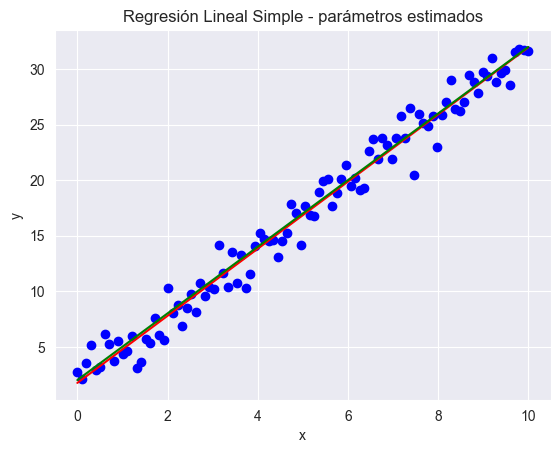

In [6]:
[theta_0_h,theta_1_h]=results_sm.params
# Visualizar los datos y la línea de regresión con los parámetros estimados
plt.scatter(x, y, color='blue')
plt.plot(x, theta_0_h + theta_1_h * x, color='red')
plt.plot(x, theta_0 + theta_1 * x, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Lineal Simple - parámetros estimados')
plt.show()

[video](https://www.youtube.com/watch?v=41rf0x_Ah54)

---

### **Interpretación del Resumen**

Cuando ejecutas `results_sm.summary()`, obtienes una tabla como esta :

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1800.0
Date:                Jan 10, 2025       Prob (F-statistic):           2.34e-72
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9820      0.051     97.647      0.000       4.881       5.083
x1             3.0300      0.048     62.987      0.000       2.934       3.126
==============================================================================
```

### **Elementos Clave del Resumen**



1. **Cabecera del Resumen**
   - **Dep. Variable**: Variable dependiente ($y$).
   - **Model**: Tipo de modelo ajustado (OLS en este caso).
   - **R-squared**: Coeficiente de determinación ($R^2$), indica el porcentaje de variación de $y$ explicado por $X$. Aquí, $R^2 = 0.95$ significa que el modelo explica el 95% de la variabilidad de los datos.
   - **Adj. R-squared**: $R^2$ ajustado, corrige $R^2$ penalizando el uso de más predictores.

2. **Tabla de Coeficientes**
   - **coef**: Valores estimados de los parámetros ($\boldsymbol{\theta}$).
   - **std err**: Error estándar de cada coeficiente, mide la incertidumbre en la estimación.
   - **t**: Estadístico $t$ para probar la hipótesis nula ($\theta_i = 0$).
   - **P>|t|**: Valor $p$ asociado al estadístico $t$. Un $p < 0.05$ generalmente indica que el coeficiente es significativamente diferente de cero.
   - **[0.025, 0.975]**: Intervalo de confianza del 95% para cada coeficiente.

   En este ejemplo:
   - El coeficiente del término constante (`const`) es $4.982$, cercano al valor verdadero ($5$).
   - El coeficiente de $x_1$ es $3.030$, cercano al valor verdadero ($3$).
   - Ambos son altamente significativos ($p < 0.05$).

3. **Estadísticas Globales**
   - **F-statistic**: Prueba de significancia global del modelo. Un valor alto indica que al menos uno de los predictores está relacionado con $y$.
   - **Prob (F-statistic)**: Valor $p$ asociado al estadístico $F$. Aquí es extremadamente pequeño ($2.34 \times 10^{-72}$), indicando que el modelo es significativo.

4. **Otros Detalles**
   - **Method**: Método usado para estimar el modelo (Mínimos Cuadrados Ordinarios).
   - **Date** y **Time**: Fecha y hora de la estimación.

4.1. **$R^2$:**
   Si el resumen muestra un $R^2 = 0.95$, significa que el modelo explica el 95% de la variabilidad en los datos.

4.2. **Valores $p$:**
   En la tabla de coeficientes:
   - Para el término constante (`const`), $p < 0.05$ indica que el intercepto es significativo.
   - Para el predictor ($x_1$), $p < 0.05$ sugiere que esta variable está significativamente asociada con $y$.

4.3. **Precaución:**
   - Un $R^2$ alto no garantiza un buen modelo, especialmente si se usan demasiados predictores ($R^2$ ajustado ayuda a penalizar la complejidad).
   - Los valores $p$ pequeños pueden resultar de tamaños de muestra grandes, incluso si los efectos no son sustanciales.

---